The estimated price of the European Call Option is: $6.21


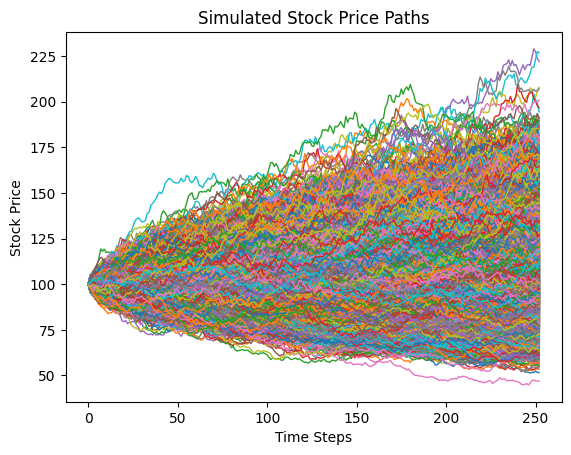

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate stock prices using Geometric Brownian Motion
def simulate_stock_price(S0, T, r, sigma, n_simulations, n_steps):
    dt = T / n_steps  # time step
    stock_paths = np.zeros((n_simulations, n_steps + 1))
    stock_paths[:, 0] = S0

    for t in range(1, n_steps + 1):
        z = np.random.standard_normal(n_simulations)  # random normal variable
        stock_paths[:, t] = stock_paths[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    return stock_paths

# Monte Carlo Simulation for Option Pricing
def monte_carlo_option_pricing(S0, K, T, r, sigma, n_simulations, n_steps):
    stock_paths = simulate_stock_price(S0, T, r, sigma, n_simulations, n_steps)
    payoff = np.maximum(stock_paths[:, -1] - K, 0)  # Call option payoff
    option_price = np.exp(-r * T) * np.mean(payoff)  # Discounted payoff
    return option_price

# Parameters
S0 = 100  # Initial stock price
K = 110   # Strike price
T = 1.0   # Time to maturity (1 year)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
n_simulations = 10000  # Number of Monte Carlo simulations
n_steps = 252  # Number of time steps (daily)

# Run Monte Carlo simulation
option_price = monte_carlo_option_pricing(S0, K, T, r, sigma, n_simulations, n_steps)

# Print the result
print(f"The estimated price of the European Call Option is: ${option_price:.2f}")

# Plotting stock price paths
stock_paths = simulate_stock_price(S0, T, r, sigma, n_simulations, n_steps)

plt.plot(stock_paths.T, lw=1)
plt.title('Simulated Stock Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()